In [1]:
import pandas as pd
import json
import datetime

In [2]:
data = []
for line in open('data/06297', 'r'):
    #print(line)
    if (not 'ERROR' in line and line != '\n'):
        try:
            line_json = json.loads(line)['stopTimes']
            #print(line_json)
            
            for time in line_json['times']['Time']:
                filtered = [line_json['actualDate'],
                            line_json['stop']['codStop'],
                            time['line']['codLine'],
                            time['codIssue'],
                            time['time']
                           ]
                #print(filtered)
                data.append(filtered)
        except Exception as e:
            pass
            #print(e)
            #print("ERROR in line: " + line)

data[0]

['2019-12-28T19:40:18+01:00',
 '8_06297',
 '8__656___',
 '5201358',
 '2019-12-28T19:45:25+01:00']

In [3]:
df = pd.DataFrame(data, columns=("actualTime", "codStop", "codLine", "codIssue", "time"))

In [4]:
df.head()

,actualTime,codStop,codLine,codIssue,time
0,2019-12-28T19:40:18+01:00,8_06297,8__656___,5201358,2019-12-28T19:45:25+01:00
1,2019-12-28T19:40:18+01:00,8_06297,8__656___,5201281,2019-12-28T19:59:00+01:00
2,2019-12-28T19:40:18+01:00,8_06297,8__560___,5201461,2019-12-28T20:19:40+01:00
3,2019-12-28T19:40:18+01:00,8_06297,8__656___,5201376,2019-12-28T20:20:05+01:00
4,2019-12-28T19:40:18+01:00,8_06297,8__658___,5201606,2019-12-28T20:28:30+01:00


In [5]:
df['time'] =pd.to_datetime(df['time'])
df['actualTime'] =pd.to_datetime(df['actualTime'])

In [6]:
df['remainingSeconds'] = (df['time'] - df['actualTime']).astype('timedelta64[s]')
df.head()

,actualTime,codStop,codLine,codIssue,time,remainingSeconds
0,2019-12-28 19:40:18+01:00,8_06297,8__656___,5201358,2019-12-28 19:45:25+01:00,307.0
1,2019-12-28 19:40:18+01:00,8_06297,8__656___,5201281,2019-12-28 19:59:00+01:00,1122.0
2,2019-12-28 19:40:18+01:00,8_06297,8__560___,5201461,2019-12-28 20:19:40+01:00,2362.0
3,2019-12-28 19:40:18+01:00,8_06297,8__656___,5201376,2019-12-28 20:20:05+01:00,2387.0
4,2019-12-28 19:40:18+01:00,8_06297,8__658___,5201606,2019-12-28 20:28:30+01:00,2892.0


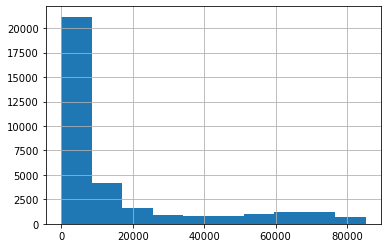

In [7]:
df['remainingSeconds'].hist()

In [8]:
df['remainingSeconds'].describe()
#df['remainingSecs'] = (datetime.datetime.fromisoformat(df['time']) - datetime.datetime.fromisoformat(df['actualTime'])).total_seconds()

count    33622.000000
mean     15369.171941
std      22110.603552
min          0.000000
25%       1524.000000
50%       4752.500000
75%      16533.000000
max      85182.000000
Name: remainingSeconds, dtype: float64

In [9]:
df.query('remainingSeconds <= 10').head()

,actualTime,codStop,codLine,codIssue,time,remainingSeconds
21085,2019-12-30 12:09:03+01:00,8_06297,8__656___,5265331,2019-12-30 12:09:11+01:00,8.0
21241,2019-12-30 12:24:02+01:00,8_06297,8__656___,5265397,2019-12-30 12:24:03+01:00,1.0
21481,2019-12-30 12:47:02+01:00,8_06297,8__656___,5264998,2019-12-30 12:47:03+01:00,1.0
21529,2019-12-30 12:51:04+01:00,8_06297,8__560___,5265706,2019-12-30 12:51:14+01:00,10.0
21745,2019-12-30 13:09:03+01:00,8_06297,8__656___,5265076,2019-12-30 13:09:10+01:00,7.0


In [10]:
df.query('remainingSeconds < 100').describe()

,remainingSeconds
count,659.000000
mean,51.634294
std,28.383149
min,0.000000
25%,37.000000
50%,52.000000
75%,74.000000
max,99.000000


In [11]:
df.query("codIssue == '5266999'")['remainingSeconds'].describe()

count     1344.000000
mean     40652.560268
std      24577.864742
min          2.000000
25%      19124.000000
50%      40877.000000
75%      62098.000000
max      82722.000000
Name: remainingSeconds, dtype: float64

In [12]:
df['codIssue'].value_counts()

5202715    1354
5267000    1344
5266999    1344
5202714    1287
5266998    1269
           ... 
5267029      19
5266208      17
5266774       8
5201358       7
5267837       6
Name: codIssue, Length: 324, dtype: int64

In [13]:
df.loc[df.groupby('codIssue')['remainingSeconds'].idxmin()].query("codLine == '8__658___'").sort_values(by='time')['time']

449     2019-12-28 20:30:00+01:00
874     2019-12-28 21:25:05+01:00
1253    2019-12-28 22:23:17+01:00
5280    2019-12-29 08:09:13+01:00
5808    2019-12-29 08:53:58+01:00
                   ...           
32926   2019-12-31 10:15:03+01:00
33298   2019-12-31 10:49:00+01:00
33612   2019-12-31 11:17:33+01:00
33615   2019-12-31 11:49:00+01:00
33617   2019-12-31 12:12:44+01:00
Name: time, Length: 66, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [14]:
df.query("remainingSeconds < 3600").loc[df.groupby('codIssue')['remainingSeconds'].idxmin()]['codLine'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


8__656___     210
8__658___      66
8__560___      34
8_N_906___     10
Name: codLine, dtype: int64

In [15]:
from matplotlib import pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


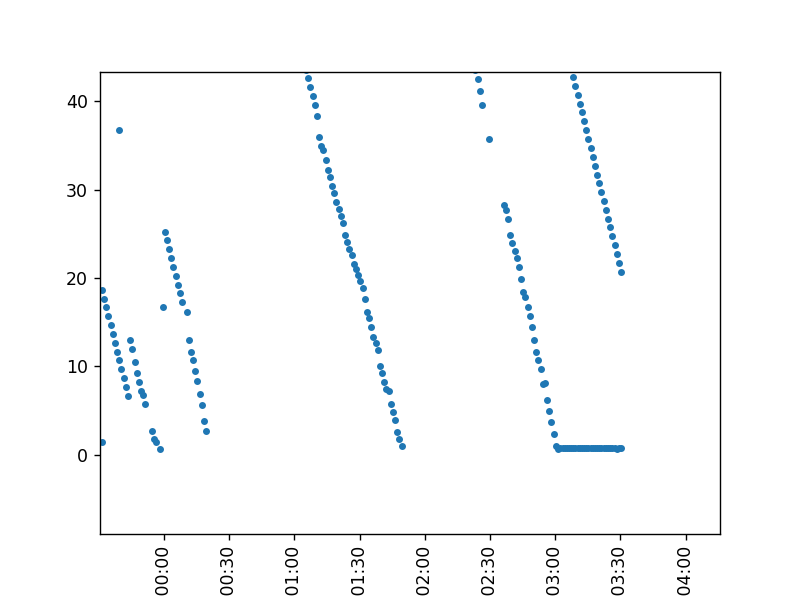

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737421.95833333, 737422.45833333, 737422.95833333, 737423.45833333,
        737423.95833333, 737424.45833333]),
 <a list of 6 Text xticklabel objects>)

In [16]:
df_sorted = df.sort_values('actualTime', ascending=True).query("codLine == '8__656___' & remainingSeconds < 1200 & actualTime > '2019-12-30 10:00:00+00'  & actualTime < '2019-12-30  10:30:00+00'")
plt.plot(df['actualTime'], df['remainingSeconds']/60, '.')
plt.xticks(rotation='vertical')

In [17]:
import seaborn
from  matplotlib import pyplot

<IPython.core.display.Javascript object>


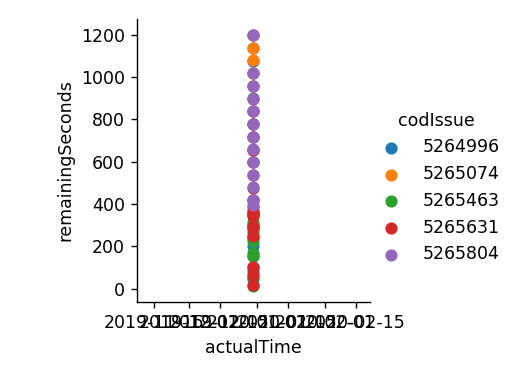

In [18]:
fg = seaborn.FacetGrid(data=df_sorted, hue='codIssue')
fg.map(pyplot.scatter, 'actualTime', 'remainingSeconds').add_legend()